In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# RANDOM_SEED = 42
# np.random.seed(RANDOM_SEED)

# Regressão Logística

Vimos nas aulas anteriores modelos lineares de regressão, onde o valor do *target* era modelado como uma combinação linear de atributos (incluindo o termo constante) mais um termo de erro $\varepsilon$ com média zero:

$$
y = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \cdots + \theta_n x_n + \varepsilon = 
\begin{bmatrix}
\theta_0 & \theta_1 & \theta_2 & \cdots & \theta_n
\end{bmatrix}
\cdot
\begin{bmatrix}
1 \\
x_1 \\
x_2 \\
\vdots \\
x_n
\end{bmatrix} + \varepsilon
= \theta^{T} \mathbf{x} + \varepsilon
$$

Nosso modelo ajustado era então $\hat{y} = h(\mathbf{x}, \theta_{opt}) = \theta_{opt}^{T} \mathbf{x}$ onde $\theta_{opt} = \arg \min_{\hat{\theta}} \text{MSE}(\hat{\theta})$ para 

$$
\text{MSE}(\hat{\theta}) = \frac{1}{m} \sum_{i = 1}^{m} \left( y_i - h(\mathbf{x}_i, \hat{\theta}) \right)^2 = \frac{1}{m} \sum_{i = 1}^{m} \left( y_i - \hat{\theta}^{T} \mathbf{x}_i \right)^2
$$

As vezes, um modelo de regressão pode ser adaptado para um modelo de classificação e vice-versa. Este é o caso da ***regressão logística***, que apesar do nome *não é um método de regressão*, mas sim um método de classificação!


## O problema: classificação binária

Suponha que tenhamos os seguintes dados que relacionam o número de horas de estudo de um aluno com o resultado de uma prova (0: não passou; 1: passou):

| horas| passou? |
|---|---|
| 3.75 | 0.0 |
| 9.51 | 1.0 |
| 7.32 | 0.0 |
| 5.99 | 1.0 |
| 1.56 | 0.0 |
| 1.56 | 0.0 |
| 0.58 | 0.0 |
| 8.66 | 1.0 |
| 6.01 | 1.0 |
| 7.08 | 1.0 |
| 0.21 | 0.0 |
| 9.70 | 1.0 |
| 8.32 | 0.0 |
| 2.12 | 0.0 |
| 1.82 | 0.0 |
| 1.83 | 0.0 |
| 3.04 | 0.0 |
| 5.25 | 1.0 |
| 4.32 | 0.0 |
| 2.91 | 0.0 |
| 6.12 | 1.0 |
| 1.39 | 0.0 |
| 2.92 | 1.0 |
| 3.66 | 1.0 |
| 4.56 | 0.0 |
| 7.85 | 1.0 |
| 2.00 | 0.0 |
| 5.14 | 0.0 |
| 5.92 | 0.0 |
| 0.46 | 0.0 |

Eis um gráfico para ajudar a visualizar esses dados:

![passou ou não](alunos.png "Resultado do teste versus número de horas de estudo")

Parece que se um aluno não estuda não passa, e se estuda bastante passa. E no meio do caminho? Como estimar a chance de que o aluno passe se estudar $7$ horas, por exemplo? Parece que precisamos de uma função interpoladora aqui! Existem várias opções de função interpoladora, vamos estudar uma delas: a **função logística**.

## Função logística

Para adaptar a regressão linear para a regressão logística (que não é regressão, mas sim um método de classificação), precisamos da *função logística*:

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

Esta função se comporta da seguinte maneira:

- Para valores muito negativos de $x$ temos $\lim_{x \rightarrow -\infty} \sigma(x) = 0$ pois o denominador da fração vai para infinito.

- Para valores muito positivos de $x$ temos $\lim_{x \rightarrow \infty} \sigma(x) = 1$ pois $e^{-x}$ vai para zero.

- Para $x = 0$ temos $\sigma(0) = 0.5$

Eis a cara dessa função:

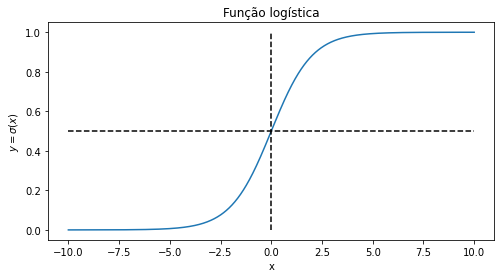

In [2]:
# Gera valores da função logística entre -10 e 10.
x = np.linspace(-10, 10, 1000)
y = 1.0/(1.0 + np.exp(-x))

plt.figure(figsize=(8,4))

# Plota a função logística.
plt.plot(x, y)

# Plota linhas auxiliares só para visualizar melhor.
plt.plot([0, 0], [0, 1], 'k--')
plt.plot([-10, 10], [0.5, 0.5], 'k--')

# Resto do gráfico: titulo, labels, etc.
plt.title('Função logística')
plt.xlabel('x')
plt.ylabel('$y = \sigma(x)$')

plt.show()

A função logística tem um formato *sigmoide* (ou seja, em forma de "s").

---

**Atividade:** Como você faria (matematicamente) para:

- Deslocar a função logística para a direita?

- Aumentar a largura da "zona de transição de zero para um"?

**R:**


Para deslocar para a direita deve-se somar uma constante maior que zero ao exponente de $e$, sendo $c$ essa constante:

$$ \frac{1}{1 + e^{-x + c}} $$

Para aumentar a largura da "zona de transição", basta multiplicar o expoente de $e$
por um número entre 0 e 1 ($k$):

$$ \frac{1}{1 + e^{-x \cdot k }} $$

obs: para diminuir essa zona de transição, basta multiplicar por uma constante $j$, tal que $ j > 1$



---

Podemos tentar ajustar uma função logística aos nossos dados dos alunos - essa é a base da regressão logística (que não é regressão, mas sim um método de classificação).

![passou ou não prob](alunos_prob.png "Probabilidade de aprovação versus número de horas de estudo")

Se tivermos que apostar se um aluno passa ou não de acordo com o número de horas de estudo deste, o melhor é adotar uma *regra de decisão* do tipo:

- $\hat{p}$ (probabilidade estimada) maior ou igual que $50\%$: acho que passa.

- $\hat{p}$ menor que $50\%$: acho que não passa.

Temos agora um classificador de aluno! Eis o gráfico deste classificador em cima dos dados:

![passou ou não class](alunos_class.png "Vai passar ou não? versus número de horas de estudo")

Essa é a idéia da regressão logística (que não é regressão, mas sim um método de classificação). Vamos estudar agora mais a fundo esse modelo, e como fazer para descobrir os parâmetros da função logística.

---

**Atividade**

- Qual o *precision*, *recall* e acurácia deste exemplo?

- Se eu quisesse garantir uma chance de aprovação de mais de $80\%$, quantas horas um aluno deveria estudar? 

**R:**
```

precision = 9/11 --> true positives / (TP + FP) que são todos os classificados como 1 

recall = 9/13

acurácia = 24/30

Deveria estudar 6,5 horas, aproximadamente.

```

---

## Modelo de regressão logística (que não é regressão, mas sim um método de classificação)

Em um modelo de regressão linear estamos prevendo o valor da variável dependente. Em uma regressão logística (que não é regressão, mas sim um método de classificação), o que estamos tentando prever? Como se trata de um método de classificação, estamos tentando prever a classe $y$ de um objeto de atributos $\mathbf{x}$. Esta classe deverá ser binária: zero ou um, negativo ou positivo. A regressão logística (que não é regressão, mas sim um método de classificação) atinge este objetivo da seguinte forma:

- Para um conjunto de parâmetros $\theta$, calcule a probabilidade (segundo o modelo) de que o objeto de atributos $\mathbf{x}$ seja da classe positiva:

$$
\hat{p} = \sigma(\theta^{T} \mathbf{x})
$$

Esta será a nossa função de decisão!

(Como encontrar $\theta$? Esse é o objetivo do algoritmo de treinamento, que vamos ver mais abaixo.)

- Determine a classe do objeto usando o threshold $0.5$:

$$
\hat{y} = \left\{ 
\begin{matrix}
0, \text{ se } \hat{p} < 0.5 \\
1, \text{ se } \hat{p} \ge 0.5 \\
\end{matrix}
\right. 
$$

Usando a nomenclatura da função indicadora: $\hat{y} = I_{x \ge 0.5}(\sigma(\theta^{T} \mathbf{x}))$ .

## Função de custo

Para obter o valor ótimo dos parâmetros $\theta$ de um modelo de regressão logística temos que definir uma função de custo. Existem inúmeras possibilidades: basta escolher uma estratégia que penalize os erros e/ou valorize os acertos.

Uma opção bastante conveniente (veremos depois porque) de função de custo para um dado objeto $(\mathbf{x}, y)$ e um vetor de parâmetros $\theta$ é a seguinte:

- A probabilidade predita é $\hat{p} = h(\mathbf{x}, \theta) = \sigma(\theta^T \mathbf{x})$

- Se a classe real $y$ for 1, a função de custo será $-log(\hat{p})$
    
- Se a classe real $y$ for 0, a função de custo será $-log(1 - \hat{p})$


--- 

**Atividade**

Explique porque esta é uma função de custo que funciona.

**R:**

Basta observar o formato da função $-log(x)$. Quando temos uma $\hat{p}$ próximo de 1, temos o custo sendo próximo de 0;

Já no caso em que temos $\hat{p}$ próximo de 0, temos a mesma coisa, teremos um erro de $-log(1-0) = -log(0) = 0$


---

A função de custo completa, para todas as amostras, é o custo médio por amostra:

$$
J(\theta) = - \frac{1}{m} \sum_{i = 1}^{m} \left[y_i \log(\hat{p}) + (1 - y_i) (\log(1 - \hat{p})) \right]
$$

Diferentemente do caso da regressão linear, aqui não temos uma solução fechada como a equação normal. Só nos resta o *gradient descent*. A boa notícia é que com essa função de custo as derivadas parciais são surpreendentemente simples:

$$
\frac{\partial}{\partial \theta_j} J(\theta) = 
\frac{1}{m} 
\sum_{i = 1}^{m} 
\left[ \sigma\left( \theta^T \mathbf{x}_i \right) - y_i \right]
\mathbf{x}_{i,j}
$$


## Iris: o verdadeiro "Hello, world!" dos modelos preditivos!

In [3]:
from sklearn import datasets
iris = datasets.load_iris()

In [4]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
print(list(iris.keys()))

['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename']


In [6]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [7]:
column_names = iris.feature_names
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


**Atividade**

Construa um classificador por regressão logística para separar as flores do tipo 'Iris Virginica' das demais usando as características 'petal length (cm)' e 'petal width (cm)'. Como resultado final, apresente:

- Acurácia do classificador no conjunto de testes.
- Curva ROC e respectiva área.
- Um diagrama ilustrando a probabilidade da classe positiva. 
    - Dica: veja https://matplotlib.org/gallery/images_contours_and_fields/contour_demo.html

Use seu arsenal de ferramentas de validação para encontrar o melhor modelo.

In [8]:
import pandas as pd
df = pd.DataFrame(iris.data, columns=column_names)

In [9]:
df["target"] = iris.target

In [10]:
df["target"] = (df["target"] == 2).astype(int)

In [11]:
df = df.drop(columns=["sepal length (cm)", "sepal width (cm)"])
df.head(3)

,petal length (cm),petal width (cm),target
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0


In [12]:
df.tail(3)

,petal length (cm),petal width (cm),target
147,5.2,2.0,1
148,5.4,2.3,1
149,5.1,1.8,1


In [13]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [14]:
x_train = train_set.drop(columns=["target"])
y_train = train_set["target"]

x_test = test_set.drop(columns=["target"])
y_test = test_set["target"]

In [15]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

In [16]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error

y_train_pred = cross_val_predict(log_reg, x_train, y_train, cv=3, n_jobs=-1)
mat = confusion_matrix(y_train, y_train_pred)
print(mat)

import time
from sklearn.model_selection import cross_val_score

t1 = time.process_time()
res = cross_val_score(log_reg, x_train, y_train, cv=3, scoring="accuracy", n_jobs=-1)
t2 = time.process_time()

print('Elapsed time: {}'.format(t2 - t1))
print(res)

[[78  3]
 [ 2 37]]
Elapsed time: 0.015625
[0.975 0.925 0.975]


In [17]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

print(f'Precision: {precision_score(y_train, y_train_pred)}')
print(f'Recall: {recall_score(y_train, y_train_pred)}')
print(f'Accuracy: {accuracy_score(y_train, y_train_pred)}')

Precision: 0.925
Recall: 0.9487179487179487
Accuracy: 0.9583333333333334


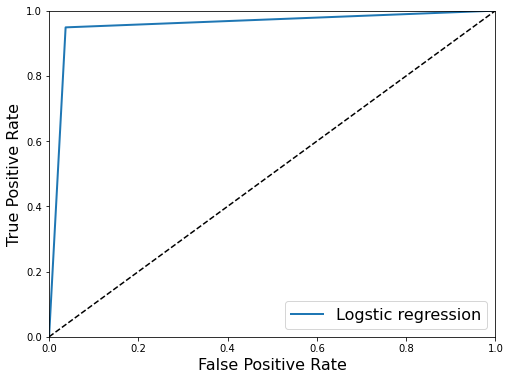

ROC AUC: 0.9558404558404558


In [18]:
from sklearn.metrics import roc_curve, roc_auc_score

y_probas = cross_val_predict(log_reg, x_train, y_train, cv=3, n_jobs=-1)

y_scores = y_probas  

fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train, y_scores)

plt.figure(figsize=(8, 6))
plt.plot(fpr_forest, tpr_forest, linewidth=2, label="Logstic regression")
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.legend(loc="lower right", fontsize=16)
plt.show()

print(f'ROC AUC: {roc_auc_score(y_train, y_train_pred)}')

In [19]:
y_test_pred = log_reg.predict(x_test)
print(accuracy_score(y_test, y_test_pred))

1.0


In [20]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=1)),
    ('clf', LogisticRegression(penalty='l1', solver='liblinear', random_state=42))
])

params = {
    'poly__degree':[1, 2, 3],
    'clf__C': [2**k for k in range(-10, 11)],
    'clf__penalty': ['l1', 'l2']
}

clf = GridSearchCV(pipe, params, cv=5, n_jobs=-1)
clf.fit(x_train, y_train)
print(clf.best_params_)

{'clf__C': 0.00390625, 'clf__penalty': 'l2', 'poly__degree': 2}


In [21]:
y_pred = clf.predict(x_test)
accuracy_score(y_test, y_pred)

0.9666666666666667

In [22]:
y_scores = clf.predict_proba(x_test)
y_scores = y_scores[:,1]

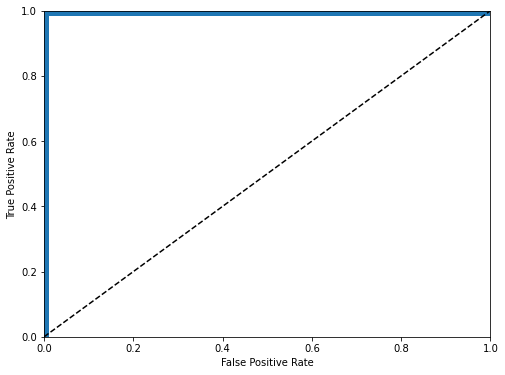

In [23]:
fpr_test, tpr_test, thresholds = roc_curve(y_test, y_scores)

plt.figure(figsize=(8,6))
plt.plot(fpr_test, tpr_test, linewidth=10)
plt.plot([0,1], [0,1], 'k--')
plt.axis([0,1,0,1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

## Classificação multiclasse

Regressão linear é bacana, mas só serve para classificação binária. Se nosso problema for de classificação multiclasse, como proceder? Uma alternativa é recorrer às técnicas de "One-Versus-One" e "One-Versus-All" vista nas aulas passadas.

Mas temos uma alternativa melhor aqui: podemos generalizar a técnica de regressão linear para a situação de várias classes: esta é a regressão linear multiclasse, ou regressão *softmax*.

### Função softmax

A regressão logística (que não é regressão mas sim classificação) consiste em ajustar aos dados (via minimização da função de custo) uma curva logística. Isso pode ser quebrado em duas partes:

- Calcular o *score* do objeto, que é $\theta^T \mathbf{x}$

- Passar o *score* pela função logística: $\hat{p} = \sigma(score)$

E se tivéssemos várias classes? Uma possibilidade é a seguinte:

- Para cada classe, calcule um *score* desta classe para o objeto: $s_k = \theta_k^T \mathbf{x}$. Note que agora temos um vetor de parâmetros $\theta_k$ por classe $k$.

- Normalize esses *scores* com o auxílio da *função softmax*:

$$
\hat{p}_k = \sigma(s(\mathbf{x}))_k = \frac{\exp\left( s_k(\mathbf{x}) \right)}{\sum_{j=1}^{K} \exp\left( s_j(\mathbf{x}) \right)}
$$

A classe atribuida ao objeto será então $\arg \max_k \sigma(s(\mathbf{x}))_k$

## Entropia cruzada

A função de custo da regressão *softmax* é muito parecida com a função de custo da regressão logística binária:

$$
J(\theta) = - \frac{1}{m} \sum_{i = 1}^{m} \sum_{k = 1}^{K} [y_i = k] \log(\hat{p}_k)
$$

onde a notação $[y_i = k]$ vale $1$ se a condição é verdadeira, e $0$ caso contrário. Esta notação chama-se "colchetes de Iverson" (*"Iverson's brackets"*).

Esta expressão é a *entropia cruzada* entre $\mathbf{y}$ e $\mathbf{\hat{p}}$. Esta é uma medida que vem da teoria da informação.

**Atividade:** Repita a atividade de classificação do dataset 'Iris' usando apenas as características 'petal length (cm)' e 'petal width (cm)'. Como resultado final, apresente:

- Acurácia do classificador no conjunto de testes.
- Diagramas ilustrando a probabilidade para cada classe
    - Dica: veja https://matplotlib.org/gallery/images_contours_and_fields/contour_demo.html

Use seu arsenal de ferramentas de validação para encontrar o melhor modelo.

In [24]:
import pandas as pd
df = pd.DataFrame(iris.data, columns=column_names)
df["target"] = iris.target
df = df.drop(columns=["sepal length (cm)", "sepal width (cm)"])
df.head(3)

,petal length (cm),petal width (cm),target
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0


In [25]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.4)

In [26]:
x_train = train_set.drop(columns=["target"])
y_train = train_set["target"]

x_test = test_set.drop(columns=["target"])
y_test = test_set["target"]

In [27]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

In [28]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(log_reg, x_train, y_train, cv=3, n_jobs=-1)
mat = confusion_matrix(y_train, y_train_pred)
mat

array([[27,  0,  0],
       [ 0, 30,  2],
       [ 0,  3, 28]], dtype=int64)

In [29]:
from sklearn.metrics import accuracy_score
y_train_pred = cross_val_predict(log_reg, x_train, y_train, cv=3, n_jobs=-1)
print(y_train_pred)
print(f'Accuracy: {accuracy_score(y_train, y_train_pred)}')

[2 1 0 2 2 1 2 1 0 1 0 1 1 1 0 1 0 0 1 2 2 1 2 0 2 2 2 1 0 2 1 0 1 1 1 0 1
 1 0 2 2 1 1 2 2 0 0 1 1 1 0 0 2 0 0 0 1 2 2 2 0 0 2 1 2 1 1 2 0 2 0 2 2 0
 1 1 1 0 0 2 2 1 0 2 2 1 2 0 1 1]
Accuracy: 0.9444444444444444


In [30]:
mat = confusion_matrix(y_train, y_train_pred)
mat

array([[27,  0,  0],
       [ 0, 30,  2],
       [ 0,  3, 28]], dtype=int64)

In [31]:
y_test_pred = log_reg.predict(x_test)
accuracy = accuracy_score(y_test, y_test_pred)

print("Acc = {}".format(accuracy))

Acc = 0.9833333333333333


**Atividade (para casa):** Repita a atividade anterior usando todas as quatro características originais. Qual o aumento de desempenho?